In [68]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [69]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
# validation= ImageDataGenerator(rescale=1./255)

In [70]:
NUM_CLASS = 65
IMAGE_SIZE = (160,160)
BATCH_SIZE = 512
SEED = 43
train = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode='grayscale',
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [71]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    label_mode="categorical",
    color_mode='grayscale',
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


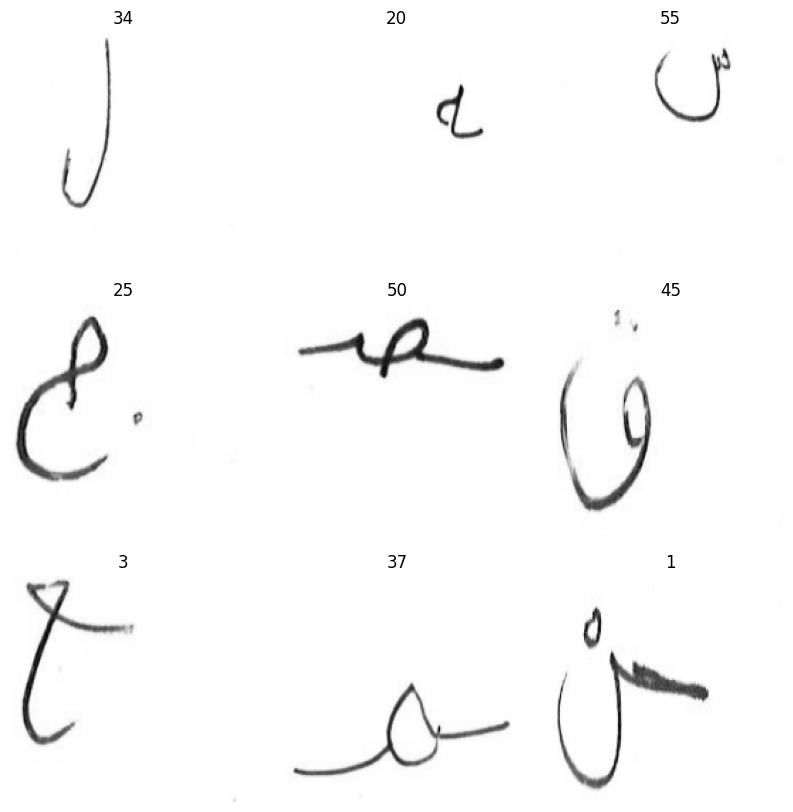

In [72]:
class_names = train.class_names
plt.figure(figsize=(10, 10))
for images, labels in train.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
        plt.axis("off")

In [73]:
for images, labels in train:
    print(images.shape)
    print(labels.shape)
    break

(512, 160, 160, 1)
(512, 65)


In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)
                         ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(65, activation=tf.nn.softmax)
])

In [75]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (512, 160, 160, 1)        0         
                                                                 
 conv2d_12 (Conv2D)          (512, 160, 160, 32)       320       
                                                                 
 max_pooling2d_12 (MaxPooli  (512, 80, 80, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (512, 80, 80, 64)         18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (512, 40, 40, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (512, 40, 40, 64)        

In [77]:
learning_rate = 0.001
lr_mod = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps=100000,\
                                                             decay_rate=0.96, staircase=True)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_mod), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [78]:
h1=model.fit(train,validation_data=train_validation,epochs=15)

Epoch 1/15
67/67 [==============================] - 29s 362ms/step - loss: 4.4087 - accuracy: 0.0181 - val_loss: 4.0645 - val_accuracy: 0.0378
Epoch 2/15
67/67 [==============================] - 26s 367ms/step - loss: 3.5591 - accuracy: 0.1210 - val_loss: 2.5992 - val_accuracy: 0.3097
Epoch 3/15
67/67 [==============================] - 27s 368ms/step - loss: 2.2390 - accuracy: 0.3864 - val_loss: 1.5373 - val_accuracy: 0.5576
Epoch 4/15
67/67 [==============================] - 26s 358ms/step - loss: 1.3507 - accuracy: 0.6167 - val_loss: 1.1022 - val_accuracy: 0.6919
Epoch 5/15
67/67 [==============================] - 26s 367ms/step - loss: 0.9965 - accuracy: 0.7260 - val_loss: 0.8589 - val_accuracy: 0.7703
Epoch 6/15
67/67 [==============================] - 26s 367ms/step - loss: 0.7655 - accuracy: 0.7956 - val_loss: 0.7618 - val_accuracy: 0.8055
Epoch 7/15
67/67 [==============================] - 26s 366ms/step - loss: 0.6545 - accuracy: 0.8317 - val_loss: 0.6510 - val_accuracy: 0.8339

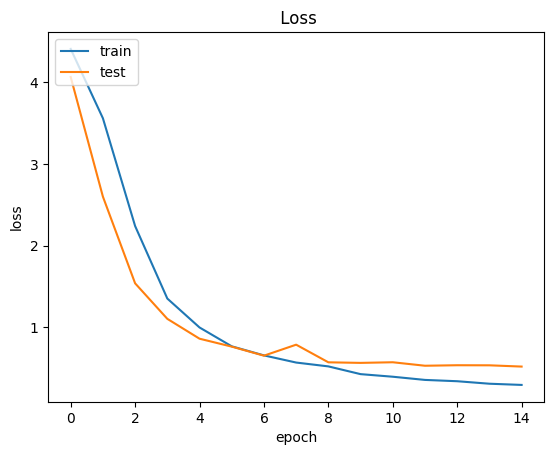

In [79]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title(' Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

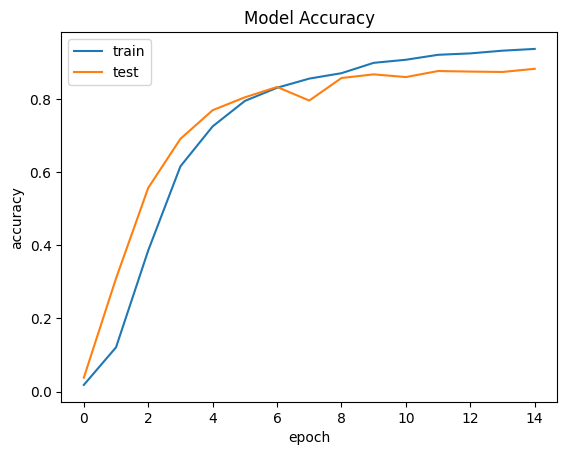

In [80]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
model.save('arabic-letters-classification_320210022.keras')

In [82]:
test_images = tf.keras.utils.image_dataset_from_directory(
        datasets[1],
        labels=None,
        label_mode="categorical",
        color_mode='grayscale',
        shuffle=False,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE)

Found 10640 files belonging to 1 classes.


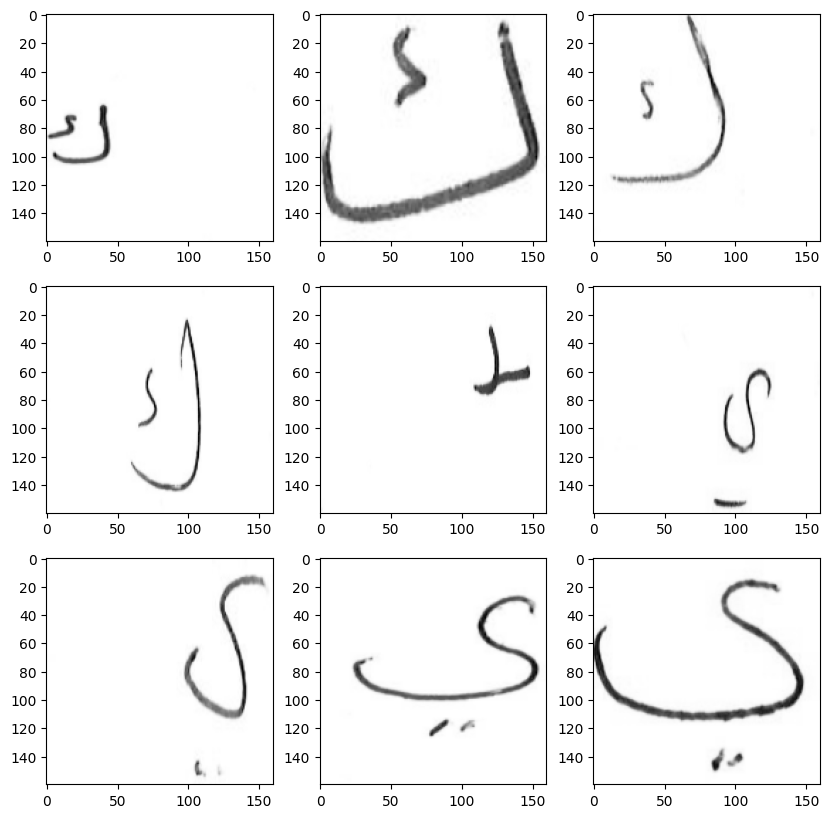

In [83]:
plt.figure(figsize=(10, 10))
for images in test_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)

In [84]:
for images in test_images:
    print(images.shape)
    break

(512, 160, 160, 1)


In [85]:
predictions = model.predict(test_images)

21/21 [==============================] - 5s 244ms/step


In [86]:
img_list = os.listdir(datasets[1])

In [87]:
labels_list = sorted(os.listdir(datasets[0]))
print(labels_list)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [88]:
predictions[1][22]

0.99033815

In [89]:
predictions.shape

(10640, 65)

In [90]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))

predictions_mod = np.argmax(predictions, 1)

for idx,image in enumerate(sorted(img_list)):
#     print(image, predictions_mod[idx])
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(labels_list[predictions_mod[idx]])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])

In [91]:
print(predictions_mod)

[28 22 22 ... 61 61 61]


In [92]:
df_predictions.head()

,ID,Label
0,0,34
0,1,29
0,10,29
0,100,29
0,1000,13


In [93]:
df_predictions.sort_values(by='ID', inplace=True)

In [94]:
df_predictions.reset_index(drop=True)

,ID,Label
0,0,34
1,1,29
2,2,29
3,3,29
4,4,29
...,...,...
10635,10635,9
10636,10636,9
10637,10637,9
10638,10638,9


In [95]:
 df_predictions.to_csv('project.csv', index=False, header=True)